## Was ist eigentlich lineare Regression?

Ein Beispiel zu Beginn:

Wir haben eine Menge zwei-dimensionaler Datenpunkte gegeben. Wir wollen einen (lineare) Funktion f finden, die - über alle denkbaren linearen Funktionen - ein bestimmtes Fehlermaß minimiert.

Gegeben sind folgende Daten:

| Kind $i$               | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   |
| ---------------------- |-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Fernsehzeit $x_i$      | 0.3 | 2.2 | 0.5 | 0.7 | 1.0 | 1.8 | 3.0 | 0.2 | 2.3 |
| Dauer Tiefschlaf $y_i$ | 5.8 | 4.4 | 6.5 | 5.8 | 5.6 | 5.0 | 4.8 | 6.0 | 6.1 |

Wir haben zu jedem Kind also zwei Merkmale erhoben, nämlich die tägliche durchschnittliche Fernsehzeit und die durchschnittliche Dauer des Tiefschlafs. Über wieviele Tage hinweg dies erhoben wurde, wissen wir nicht.

Das Merkmal Fernsehzeit werden wir mit x bezeichnen, das Merkmal Tiefschlaf mit y.   

[[0.2 6. ]
 [0.3 5.8]
 [0.5 6.5]
 [0.7 5.8]
 [1.  5.6]
 [1.8 5. ]
 [2.2 4.4]
 [2.3 6.1]
 [3.  4.8]]


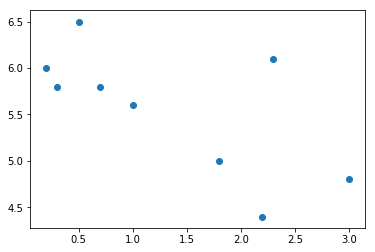

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([ [0.3, 5.8], [2.2, 4.4], [0.5, 6.5], [0.7, 5.8],
    [1.0, 5.6], [1.8, 5.0], [3.0, 4.8], [0.2, 6.0], [2.3, 6.1]])

# Sortieren abhängig von x, damit es später einfacher wird
# Achtung: np.sort macht nicht das, was sie erwarten würden... gar nicht ;)
data = data[data[:,0].argsort()]
print(data)

x = data[:,0] # Get value in all tuples at position 0 (=Fernsehzeit)
y = data[:,1] # Get value in all tuples at position 1 (=Dauer Tiefschlaf)

plt.scatter(x,y) # I will never understand the idea behind being forced to unzip the data ...
plt.show()

Zu beiden Datenreihen kann man den Mittelwert bestimmen:

In [2]:
n = len(x) # or len(y), both have the same length

x_avg = sum(x) / n
y_avg = sum(y) / n

print("x: ",x," Average: ",x_avg)
print("y: ",y," Average: ",y_avg)

# we could as well use the function "mean" from np directly:
print("\nMean x: ",np.mean(x),", Mean y: ",np.mean(y))

x:  [0.2 0.3 0.5 0.7 1.  1.8 2.2 2.3 3. ]  Average:  1.3333333333333333
y:  [6.  5.8 6.5 5.8 5.6 5.  4.4 6.1 4.8]  Average:  5.555555555555555

Mean x:  1.3333333333333333 , Mean y:  5.555555555555555


Beide Datenreihen weichen von ihren Mittelwerten ab. Wir wollen nun mittels eines 
linearen Zusammenhangs erklären, welche Abweichung wir für __ein__ Merkmal zu erwarten haben, wenn wir
das __andere__ Merkmal abweichen lassen. Konkret werden wir uns fragen, was wir für einen y-Wert zu erwarten haben, 
wenn wir einen x-Wert vorgeben. Wir könnten aber auch von y ausgehen und x _vorhersagen_ wollen.

Wenn man von den Mittelwerten aus denkt, dann kann man sich folgendes fragen: wenn ein $x_i$ um eine gewisse Differenz vom Mittelwert abweicht, wieviel Abweichung sollten wir dann für $y_i$ erwarten?

Bestimmen wir einmal die Abweichungen und zeichnen diese:

[-1.13333333 -1.03333333 -0.83333333 -0.63333333 -0.33333333  0.46666667
  0.86666667  0.96666667  1.66666667]
[ 0.44444444  0.24444444  0.94444444  0.24444444  0.04444444 -0.55555556
 -1.15555556  0.54444444 -0.75555556]


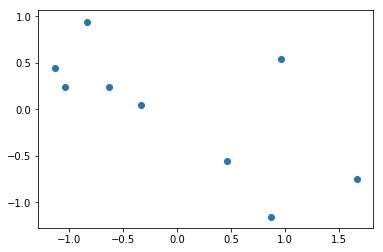

In [3]:
x_diff = np.add(x,-x_avg)
print(x_diff)
y_diff = np.add(y,-y_avg)
print(y_diff)

plt.scatter(x_diff,y_diff)
plt.show()

Der Plot sieht noch genau so aus, wie oben, wir haben nur die x und y-Werte so verschoben, dass sie jetzt um den Nullpunkt $(0,0)$ streuen. Diesen Daten haben jetzt einen veränderten Average: es ist für beide Dimensionen (fast genau) $0$:

In [4]:
print("\nMean x_diff: ",np.mean(x_diff),", Mean y_diff: ",np.mean(y_diff))


Mean x_diff:  9.868649107779169e-17 , Mean y_diff:  9.868649107779169e-17


Fragen wir uns nun einmal, in welchem Verhältnis die Abweichungen zu einander stehen:

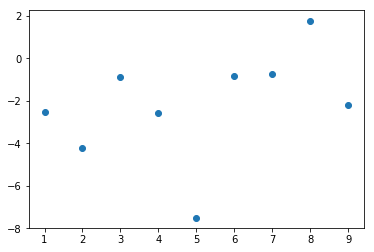

Mean ratio:  -2.1967674342464285


In [5]:
ratios = [a/b for a,b in zip(x_diff,y_diff)]

# Show the result
index = range(1,n+1)
plt.scatter(index,ratios)
plt.show()

mean_ratio = np.mean(ratios)
print("Mean ratio: ", mean_ratio)

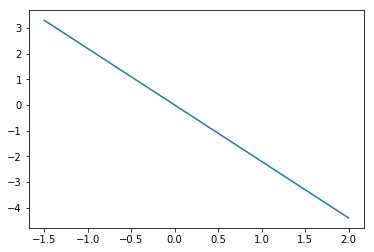

In [6]:
# Now, we define a simple linear function which captures the "average" relation between x and y

def lin_func(x):
    return x * mean_ratio

# Let's plot it between -1.5 and 2
f_x = np.linspace(-1.5,2,100) # 2 Punkte würden auch reichen...
f_y = np.vectorize(lin_func)(f_x)

# print(f_x,f_y)

plt.plot(f_x,f_y)
plt.show()

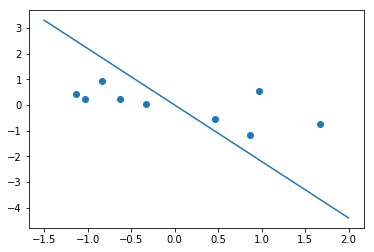

In [7]:
# Let's see how this relates to our "corrected" input data
plt.plot(f_x,f_y)
plt.scatter(x_diff,y_diff)
plt.show()

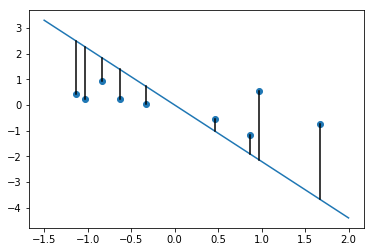

In [8]:
# With error bars
plt.plot(f_x,f_y)
plt.scatter(x_diff,y_diff)

for x_v,y_v in zip(x_diff,y_diff):
    plt.plot((x_v,x_v),(lin_func(x_v),y_v), 'k-')

plt.show()

Der mean_ratio, den wir oben bestimmen, gibt an, um wieviel y relativ zu x "im Mittel" variert, wenn x sich verändert. Ändert sich x beispielsweise um 1, dann ändert sich y ungefähr um -2.19. Ein steigendes x führt also zu fallendem y, mehr Fernsehzeit führt also zu (deutlich) reduzierter Tiefschlafzeit (denn die Einheit ist an sich identisch, eine Stunde mehr Fernsehen führt "im Mittel" zu mehr als 2 Stunden WENIGER Tiefschlaf. Aua.)

Was bedeutet unsere Formulierung "im Mittel" oben eigentlich? Wir haben einfach jede Ratio ausgerechnet, diese aufaddiert und  durch n=9 geteilt. Macht das wirklich Sinn? Schaut man sich den Graphen oben an, in dem die Ratios eingezeichnet sind, dann sieht man, dass es einen ziemlich großen "Ausreisser" gibt (mit einem Wert nahe an -8), der den Mittelwert stark beeinflusst. Fragen wir uns einmal, ob es eine "bessere" lineare Funktion geben könnte, um die Beziehung zwischen x und y zu "linearisieren".

Um das Wort "besser" in den Griff zu bekommen, müssen wir uns zunächst fragen, wie wir den Fehler messen wollen, den unsere lineare Funktion macht.

Erste Idee: wir nehmen die tatsächliche Abweichung der Vorhersage vom beobachteten Wert, wir rechnen:

${\hat y\_{diff}_{i}} = lin\_func(x\_{diff}_{i})$

Es gibt aber meist eine Differenz zwischen dem Vorhersagewert ${\hat y\_{diff}_{i}}$ und dem "wahren" Wert $y\_{diff}_{i}$. Diese Differenz bezeichnen wir als Fehler $\epsilon_{i}$.

Insgesamt ergibt sich eine Fehlersumme von

${Error} = \sum ({y\_diff}_{i} - {\hat y\_{diff}_{i}}) = \sum (y\_{diff}_{i} - lin\_func(x\_{diff}_{i})) = \sum \epsilon_{i}$

Welcher Fehler ergibt sich für unsere gefundene lineare Funktion?


In [9]:
e_y = [(b - lin_func(a)) for a,b in zip(x_diff,y_diff)]

print(e_y)

print(np.sum(e_y)) # praktisch 0

[-2.0452253143681745, -2.0255485709435312, -0.8861950840942456, -1.1468415972449602, -0.6878113669710317, 0.46960258042611147, 0.7483095541246836, 2.667986297549325, 2.9057235015218255]
2.220446049250313e-15


Jetzt entsteht ein Problem: wenn wir nun einfach die positiven und die negativen Abweichungen aufaddieren, heben diese sich gegenseitig auf. Im Extremfall könnten wir dann eine sehr verwackelelte, sich aber sehr gut ausgleichende Vorhersage nicht von einer perfekten Vorhersage unterscheiden, beide hätten möglicherweise einen kummulierten Fehler von 0 (man könnte damit immer noch leben, wenn man zusäztlich die Varianz des Fehlers erheben würde, aber wir wollen erstmal nur eine Zahl haben, die uns erlaubt, den Fehler halbwegs ordentlich "auf einen Blick" einzuschätzen).

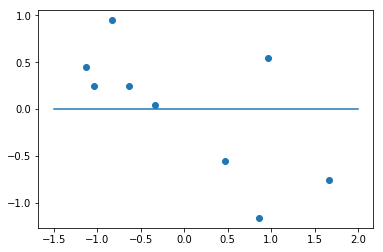

[0.44444444444444464, 0.24444444444444446, 0.9444444444444446, 0.24444444444444446, 0.04444444444444429, -0.5555555555555554, -1.155555555555555, 0.5444444444444443, -0.7555555555555555]
8.881784197001252e-16


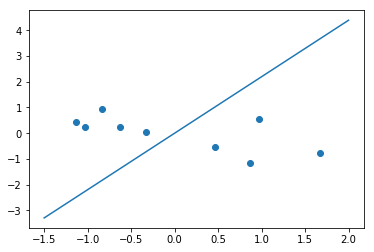

[2.9341142032570637, 2.51443745983242, 2.775083972983135, 1.635730486133849, 0.7767002558599203, -1.5807136915372222, -3.059420665235794, -1.5790974086604366, -4.416834612632936]
-1.7763568394002505e-15


In [10]:
# Probieren wir zwei weitere Funktionen aus
# und schauen uns den entstehenden Fehler an

from functools import partial
def lfunc(m,b,x):
    return m*x + b

# Erste Funktion
lfunc1 = partial(lfunc,0,0)
f_y1 = np.vectorize(lfunc1)(f_x)

plt.plot(f_x,f_y1)
plt.scatter(x_diff,y_diff)

plt.show()

e_y1 = [(b - lfunc1(a)) for a,b in zip(x_diff,y_diff)]
print(e_y1)
print(np.sum(e_y1)) # praktisch 0,  und noch kleiner

# Zweite Funktion
lfunc2 = partial(lfunc,-mean_ratio,0)
f_y2 = np.vectorize(lfunc2)(f_x)

plt.plot(f_x,f_y2)
plt.scatter(x_diff,y_diff)

plt.show()

e_y2 = [(b - lfunc2(a)) for a,b in zip(x_diff,y_diff)]
print(e_y2)
print(np.sum(e_y2)) # praktisch 0,  und noch kleiner

Beide Fehler sind jeweils kleiner, als unser erster Fehler. Alle Fehler sind nahe 0. Die Funktionen sehen sehr unterschiedlich aus, mindestens die letzte Funktion ist auf keinen Fall eine sinnvolle Funktion, wenn es um das Erfassen des Zusammenhangs zwischen $x$ und $y$ geht!

Gehen wir also zur zweiten Idee über, die Summe der Beträge der Fehler, also der absolute Fehler:

${Error} = \sum |{y\_diff}_{i} - {\hat y\_{diff}_{i}}| = \sum |y\_{diff}_{i} - lin\_func(x\_{diff}_{i})| = \sum |\epsilon_{i}|$


In [11]:
import math

e_abs = [math.fabs(e) for e in e_y]
print(e_abs)

def show_abs_error(e_abs):   
    absolute_error = sum(e_abs)
    absolute_error_avg = absolute_error / n
    print("     Absolute Error: ",absolute_error,", Average absolute error: ",absolute_error_avg)
    
print("\nFehler der ersten Funktion:")
show_abs_error(e_abs)  
print("Fehler der zweiten Funktion:")
show_abs_error([math.fabs(e) for e in e_y1])
print("Fehler der dritten Funktion:")
show_abs_error([math.fabs(e) for e in e_y2])

[2.0452253143681745, 2.0255485709435312, 0.8861950840942456, 1.1468415972449602, 0.6878113669710317, 0.46960258042611147, 0.7483095541246836, 2.667986297549325, 2.9057235015218255]

Fehler der ersten Funktion:
     Absolute Error:  13.583243867243889 , Average absolute error:  1.5092493185826543
Fehler der zweiten Funktion:
     Absolute Error:  4.933333333333333 , Average absolute error:  0.548148148148148
Fehler der dritten Funktion:
     Absolute Error:  21.272132756132777 , Average absolute error:  2.363570306236975


Welche lineare Funktion optimiert diesen Fehler? Finden wir es heraus! (wir verwenden hier nochmal partial, nur in schöner ;)

In [12]:
def lin_func_m(x,gradient=mean_ratio):
    return x * gradient

def abs_error(x,y,func):
    err = [math.fabs(b - func(a)) for a,b in zip(x,y)]
    return sum(err)

# our mean_ratio

ef_1 = partial(lin_func_m) # Error function 1
print(abs_error(x_diff,y_diff,ef_1))

# ... one less
ef_2 = partial(lin_func_m,gradient=mean_ratio-1) # Error function 2
print(abs_error(x_diff,y_diff,ef_2))

# ... one more (which is BETTER!)
ef_3 = partial(lin_func_m,gradient=mean_ratio+1) # Error function 3
print(abs_error(x_diff,y_diff,ef_3))

13.583243867243889
21.51657720057722
5.886624758994522


Abhängig von der Wahl des Gradienten verändert sich der Fehlerwert! Genauso könnten (und das tun wir später auch noch) den Y-Achsenabschnitt variieren, wir suchen jetzt aber zunächst für unseren um $(0,0)$ verschobenen Datensatz die beste Gerade durch $(0,0)$, also mit einem Y-Achsenabschnitt von $0$. Weiter unten werden wir auch noch ein Fehlergebirge sehen, das von den Variationen in $m$ und $b$ erzeugt wird. Es sei aber schon verraten: die Regressionsgerade für die Minimierung des quadratischen Fehlers (den wir später betrachten werden) läuft immer durch den Schwerpunkt $(x_{avg},y_{avg})$ der Daten, also für unsere verschobenen Daten tatsächlich durch $(0,0)$. Warum die Gerade durch den Schwerpunkt gehen MUSS, wird weiter unten noch gezeigt.

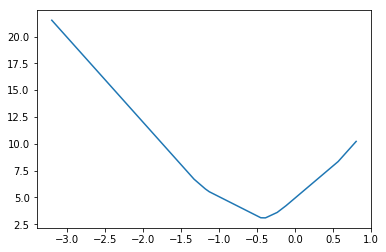

In [68]:
# Let's try this systematically
gradients = np.linspace(mean_ratio-1,mean_ratio+3,1000)
abs_errors = np.array([abs_error(x_diff,y_diff,partial(lin_func_m,gradient=g)) for g in gradients])

plt.plot(gradients,abs_errors)
plt.show()

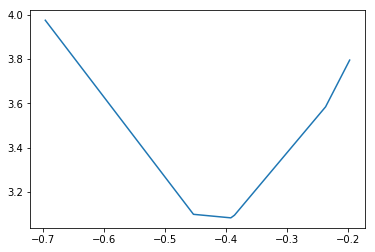

In [69]:
# Let's look near the optimum:
gradients = np.linspace(mean_ratio+1.5,mean_ratio+2.0,1000)
abs_errors = np.array([abs_error(x_diff,y_diff,partial(lin_func_m,gradient=g)) for g in gradients])

plt.plot(gradients,abs_errors)
plt.show()


## Suchen nach der optimalen Steigung

Wir können das mit einem "Gradient Descent" genannten, iterativen Verfahren probieren. Die Idee ist einfach: was wir im Bild sehen, ist die Fehlerfunktion zu unserem absoluten Fehler, die vom vorgegebenen Gradienten, also der Steigung unser Geraden, die wir in den $(x_{diff},y_{diff})$-Raum legen, abhängt. Wir suchen in dieser Fehlerfunktion nach einem Minimum. Eine elementare Idee ist es, "irgendwo" zu beginnen und sich dann in Richtung des gesuchten Extremums zu bewegen. Das nennt man "hill climbing" (man sucht oft nach Maxima!), in unserem Fall hieße es besser "hill sliding" (wir suchen ja nach einem Minimum). Um sich in die richtige Richtung zu bewegen, muss man wissen, wie sich die Kurve am betrachteten Punkt verhält: wo geht es nach oben, wo nach unten? Das kann einem die Steigung der Kurve in diesem Punkt sagen. Man könnte nun analytisch differenzieren (werden wir noch tun werden), oder auch einfach in einer kleinen Umgebung um den Punkt die Steigung "experimentell" bestimmen. Eigentlich brauchen wir sowieso gar nicht die Steigung, sondern müssen nur wissen, wo es kleiner und wo größer wird (falls es das wird...- sonst wird es ein wenig schwieriger).

Man kann das noch mit diversen mehr oder minder cleveren Ideen verbinden, z.B. weitere Testsprünge zulassen, binäre Suche integrieren etc. Wir machen es einfach "straightforward" in unserer ersten Lösung: wir variieren um eine fixe Schrittweite, und zwar solange, bis wir keine Verbesserung mehr finden:


In [70]:
def grad_descent(initial_value=0,step=0.1,bound=5):
    initial_v = abs_error(x_diff,y_diff,partial(lin_func_m,gradient=initial_value))
    left_v    = abs_error(x_diff,y_diff,partial(lin_func_m,gradient=initial_value - step))
    right_v   = abs_error(x_diff,y_diff,partial(lin_func_m,gradient=initial_value + step))
    #print(left_v,initial_v,right_v)
    
    computed_while = 0
    
    # find the correct direction to start with    
    if left_v < initial_v:
        # go to the left side! (if both are better, 
        # still go only to the left! One could split here)
        step = -step
        last_v = left_v  
    elif right_v >= initial_v: 
        # no improvement! Best argument value has been found (given the step size that we tried)
        return initial_value
    else:
        # go to the right side
        last_v = right_v

    next_v = initial_value + step # we did one step already
    while True:
        next_v = next_v + step # take the next step                          
        test_v = abs_error(x_diff,y_diff,partial(lin_func_m,gradient=next_v))
        # print(next_v,":",test_v)
        # is it an improvement?
        if test_v < last_v:
            # Guard against running out-og-bounds
            if math.fabs((next_v + step) - initial_value) > bound:
                print("WARNING: we stopped iterating on the boundary! Might not be a true minimum!")
                print("While-Loops: ",computed_while)
                return next_v
            last_v = test_v # ok, one more step should be tried! Remember what we found!
        else:
            print("While-Loops: ",computed_while," - Error value: ", last_v)
            return next_v - step # one step before the last step was better
        computed_while += 1 # counting the while loops
                           
print("Best gradient found with step size 1: ",grad_descent(initial_value=mean_ratio, step=1))
print("Best gradient found with step size 0.1: ",grad_descent(initial_value=mean_ratio, step=0.1))
print("Best gradient found with step size 0.01: ",grad_descent(initial_value=mean_ratio, step=0.01))
print("Best gradient found with step size 0.001: ",grad_descent(initial_value=mean_ratio, step=0.001))
print("Best gradient found with step size 0.0001: ",grad_descent(initial_value=mean_ratio, step=0.0001))
print("Best gradient found with step size 0.00001: ",grad_descent(initial_value=mean_ratio, step=0.00001))

While-Loops:  1  - Error value:  3.795018128463492
Best gradient found with step size 1:  -0.1967674342464285
While-Loops:  17  - Error value:  3.0835824269101577
Best gradient found with step size 0.1:  -0.3967674342464277
While-Loops:  179  - Error value:  3.0835824269101586
Best gradient found with step size 0.01:  -0.3967674342464311
While-Loops:  1803  - Error value:  3.082515760243526
Best gradient found with step size 0.001:  -0.3927674342465597
While-Loops:  18045  - Error value:  3.082355760243427
Best gradient found with step size 0.0001:  -0.3921674342461905
While-Loops:  180460  - Error value:  3.0823530935753114
Best gradient found with step size 0.00001:  -0.39215743424075594


Wir könnten die Funktion oben leicht generalisieren, in dem wir eine zu testende Error-Function als Parameter mit übergeben würden (und die zugehörigen Daten). Das bauen wir gleich mit ein. Die sehr kleinen Schrittweiten werden schon ziemlich teuer, das könnten wir natürlich verbessern mit einer großen Schrittweite, die dann kleiner wird und die Richtung umschaltet, wenn es zu einer Verschlechterung kommt:

In [71]:
def grad_descent(initial_value=0,min_step=0.00001,max_step=1,bound=5,efunc=abs_error):
    step = max_step
    
    initial_v = efunc(x_diff,y_diff,partial(lin_func_m,gradient=initial_value))
    left_v    = efunc(x_diff,y_diff,partial(lin_func_m,gradient=initial_value - step))
    right_v   = efunc(x_diff,y_diff,partial(lin_func_m,gradient=initial_value + step))
    #print(left_v,initial_v,right_v)
    
    computed_while = 0
    
    # find the correct direction to start with    
    if left_v < initial_v:
        # go to the left side! (if both are better, 
        # still go only to the left! One could split here)
        step = -step
    elif right_v >= initial_v: 
        # no improvement! Best argument value has been found (given the step size that we tried)
        return initial_value
    
    last_v = efunc(x_diff,y_diff,partial(lin_func_m,gradient=initial_value + step))
    next_v = initial_value + step # we did one step already
    
    
    while True:
        last_grad = next_v
        next_v = next_v + step # take the next step                          
        test_v = efunc(x_diff,y_diff,partial(lin_func_m,gradient=next_v))
        # print(next_v,":",test_v) # comment in to see the development of values
        # is it an improvement?
        if test_v < last_v:
            # Guard against running out-of-bounds
            if math.fabs((next_v + step) - initial_value) > bound:
                print("WARNING: we stopped iterating on the boundary! Might not be a true minimum!")
                print("While-Loops: ",computed_while)
                return next_v
            last_v = test_v # ok, one more step should be tried! Remember what we found!
        else:
            # reduce stepsize, change direction
            step = -(step/10)            
            print("Changed step size and direction: ",step,"(",computed_while,")")
            if math.fabs(step) < min_step:
                print("While-Loops: ",computed_while," - Error value: ", last_v)
                return last_grad # one step before the last step was better
            # Accept something worse...
            last_v = test_v # ok, one more step should be tried! Remember what we found!
        computed_while += 1 # counting the while loops
                           

print("Best gradient found: ",grad_descent(initial_value=mean_ratio, min_step=0.0000001))

Changed step size and direction:  -0.1 ( 1 )
Changed step size and direction:  0.01 ( 14 )
Changed step size and direction:  -0.001 ( 25 )
Changed step size and direction:  0.0001 ( 32 )
Changed step size and direction:  -1e-05 ( 49 )
Changed step size and direction:  1.0000000000000002e-06 ( 59 )
Changed step size and direction:  -1.0000000000000002e-07 ( 70 )
Changed step size and direction:  1.0000000000000002e-08 ( 76 )
While-Loops:  76  - Error value:  3.0823529602434907
Best gradient found:  -0.39215693424642895


Mit dem grad_descent, der die Richtung und die Schrittweite wechselt, finden wir nach 76 Loops die folgende Lösung:

(Minimal) Error value: 3.0823529602434907
Best gradient found:  -0.39215693424642895
    
Hierbei sind wir bis zu einer Schrittweite von 0.0000001 herunter gegangen. Gehen wir nur bis 0.00001 oder 0.000001 herunter, finden wir eine etwas schlechtere Lösung, als der andere Algo, das liegt aber eher an Rechenungenauigkeiten durch die Floats, als an etwas anderem. Für den anderen Algo würde es im übrigen sehr, sehr teuer, auf die noch kleinere Schrittweite umzustellen.

Der erste Algo oben liefert nach 180460 Runden das folgende, leicht schlechtere, Ergebnis:

While-Loops:  180460, Error value:  3.0823530935753114
Best gradient found with step size 0.00001:  -0.39215743424075594                                            

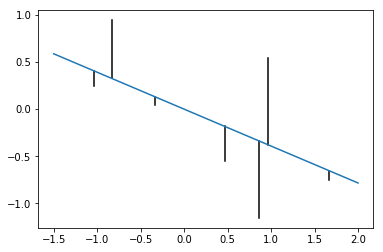

In [72]:
# "Optimal" gradient found so far
# Now, we define a simple linear function which captures the "average" relation between x and y

line = partial(lin_func_m,gradient=-0.39215693424642895)

# Let's plot it between -1.5 and 2
f_x = np.linspace(-1.5,2,100)
f_y = np.vectorize(line)(f_x)

for x_v,y_v in zip(x_diff,y_diff):
    plt.plot((x_v,x_v),(line(x_v),y_v), 'k-')

plt.plot(f_x,f_y)
plt.show()

## Eine typische Alternative: Abstandsquadrate

Tatsächlich macht es manchmal durchaus Sinn, die absoluten Fehler zu verwenden. Ganz oft möchte man aber Ausreisser besonders bestrafen (wenn die Ausreisser sehr weit ausreissen, kann das auch eine schlechte Idee sein!) und in aller Regel verwendet man dann den quadratischen Fehler, dessen Summe man dann minimieren möchte:

${Error} = \sum ({y\_diff}_{i} - {\hat y\_{diff}_{i}})^2 = \sum (y\_{diff}_{i} - lin\_func(x\_{diff}_{i}))^2 = \sum {\epsilon_{i}}^2$

Schauen wir mal, wie dann die Fehlerkurve für variiernde Steigung aussieht:


[0.0554864197530863, 0.14104197530864188, 0.19753086419753108, 0.01837530864197529, 0.024197530864197566, 0.07593086419753071, 0.40393086419753, 1.2643753086419751, 0.0597530864197531]
2.240622222222221


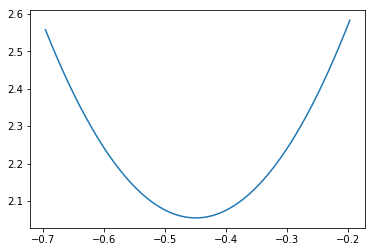

2.240622222222221
2.240622222222221


In [73]:
def quad_error(x,y,func,debug=False):
    err = [((b-func(a))*(b-func(a))) for a,b in zip(x,y)]
    if debug: print(err)
    return sum(err)

quad_errors = np.array([quad_error(x_diff,y_diff,partial(lin_func_m,gradient=g)) for g in gradients])

print(quad_error(x_diff,y_diff,partial(lin_func_m,gradient=-0.6),debug=True))

# print(gradients,quad_errors)
plt.plot(gradients,quad_errors)
plt.show()

def error_direct(x,y,m):
    err = [(b-(a*m))*(b-(a*m)) for a,b in zip(x,y)]
    return sum(err)
print(error_direct(x_diff,y_diff,-0.6))

def error_transformed(x,y,m):
    err = [(b*b)-(2*a*b*m)+(a*a*m*m) for a,b in zip(x,y)]
    return sum(err)
print(error_transformed(x_diff,y_diff,-0.6))


Oh, das sieht doch sehr nach einer quadratischen Funktion aus. Was können wir mit quadratischen Funktionen? Genau, wir können sie differenzieren. Doch eins nach dem anderen. Erstmal suchen wir mit unserem _Gradient_\__Descent_ nach einem guten Gradienten:

In [74]:
print("Best gradient found: ",grad_descent(initial_value=mean_ratio, min_step=0.0000001,efunc=quad_error))

Changed step size and direction:  -0.1 ( 1 )
Changed step size and direction:  0.01 ( 15 )
Changed step size and direction:  -0.001 ( 31 )
Changed step size and direction:  0.0001 ( 45 )
Changed step size and direction:  -1e-05 ( 55 )
Changed step size and direction:  1.0000000000000002e-06 ( 63 )
Changed step size and direction:  -1.0000000000000002e-07 ( 73 )
Changed step size and direction:  1.0000000000000002e-08 ( 82 )
While-Loops:  82  - Error value:  2.054822006472509
Best gradient found:  -0.44983823424642877


## Analytisches Bestimmen des Optimums

Eben haben wir das Optimum iterativ bestimmt. Wir wollen nun die folgende Fehlerfunktion analytisch minimieren. Hierzu müssen wir das best-mögliche $m$ finden!

${Error}(m) = E(m) = \sum {\epsilon_{i}}^2 = \sum ({y\_diff}_{i} - {\hat y\_{diff}_{i}})^2 = \sum (y\_{diff}_{i} - (x\_{diff}_{i}*m))^2$

Diese Fehlerfunktion ist offensichtlich quadratisch und abhängig vom gewählten $m$ und dem konkret vorgegebenen Datensatz $(x_{diff},y_{diff})$, der ja fix bleibt. Die Subskribierung _diff_ lassen wir um der Lesbarkeit willen weg:

$E(m) = \sum (y_{i} - x_{i}*m)^2$

$ = \sum ((y_{i} - x_{i}*m) * (y_{i} - x_{i}*m))$

$ = \sum (y_{i}^2 - 2 (y_{i} * x_{i}*m) + (x_{i}*m)^2)$

$ = \sum y_{i}^2 - 2 \sum (y_{i} * x_{i}*m) + \sum (x_{i}^2*m^2)$

$ = \sum y_{i}^2 - 2 \sum (y_{i} * x_{i}) * m + \sum (x_{i}^2) * m^2$

Diese einfache Umformung stimmt noch, wie wir hier sehen:

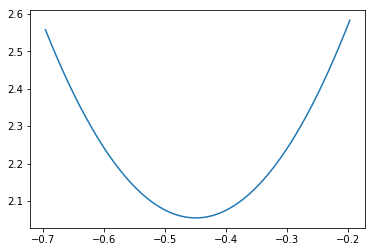

Faktor a_1: 8.24 
Faktor a_2: 7.413333333333334


In [75]:
def q0_error(y): # y^2
    err = [b*b for b in y]
    return sum(err)

def q1_error(x,y): # -2*x*y
    err = [a*b for a,b in zip(x,y)]
    return -2*sum(err)

def q2_error(x): # x^2
    err = [a*a for a in x]
    return sum(err)

def q3_error(x,y,m):
    return q0_error(y) + q1_error(x,y)*m + q2_error(x)*m*m # y^2 + -2*x*y*m + x^2*m^2

q_neu_errors = np.array([q3_error(x_diff,y_diff,g) for g in gradients])
plt.plot(gradients,q_neu_errors)
plt.show()

# To see the function without y^2
# def q4_error(x,y,m): # ohne y^2
#    return q1_error(x,y)*m + q2_error(x)*m*m # -2*x*y*m + x^2*m^2

# q_neu_errors1 = np.array([q4_error(x_diff,y_diff,g) for g in gradients])
# plt.plot(gradients,q_neu_errors1)
# plt.show()

# To be used below
a1 = q2_error(x_diff)
a2 = q1_error(x_diff,y_diff)
print("Faktor a_1:",a1,"\nFaktor a_2:",a2)

Wann wird dies Fehlerfunktion nun minimal? Nun, zunächst mal sehen wir, dass die nur von $(x_{diff},y_{diff})$, nicht aber von $m$, abhängigen Faktoren für diese Überlegung irrelevant sind


$ E_1(m) = -2 \sum (y_{i} * x_{i}) *m + \sum (x_{i}^2) * m^2$

Schreiben wir das ein wenig um, damit dem geneigten Leser klarer wird, das wir hier eine ganz normale Funktion vor uns haben. Wir ersetzen $\sum (x_{i}^2)$ durch $a_1$ und $-2 \sum (y_{i} * x_{i})$ durch $a_2$:

$ E_1(x) = a_2*m + a_1*m^2 = a_1*m^2 + a_2*m$

Wir wissen, dass eine nach oben zeigende quadratische Funktion nur dort minimal wird, wo die erste Ableitung $0$ ist. Rechts und links von diesem Minmum wächst die Steigung - und damit der Funktionswert in der Ausgangsfunktion.

$E_1$ ist aus zwei Funktionen zusammengesetzt, die wir beide nach $m$ ableiten können:

$ E_1^{'}(m) = (a_1*m^2)^{'} + (a_2*m)^{'} = 2*a_1*m + a_2$

Setzen wir das gleich mit $0$:

$2*a_1*m + a_2 = 0$ $\equiv$ $m = -a_2/(2*a_1)$

Setzen wir wieder ein:

$m = (2*\sum (y_{i} * x_{i})) / 2*(\sum (x_{i}^2)) = \sum (y_{i} * x_{i}) / \sum (x_{i}^2)$

Achtung: $x$ und $y$ hier sind unsere $x_{diff}$ und $y_{diff}$ von oben, wir haben also unsere finale Gerade noch nicht bestimmt, sondern die, die durch die "differenzierten" Daten läuft.

Rechnen wir das aus (wir gehen von $m = -a_2/(2*a_1)$ aus):

In [76]:
m_opt = -a2/(2*a1)
print("Optimaler Gradient: ",m_opt)

Optimaler Gradient:  -0.4498381877022654


## Diskussion

Vom analytisch bestimmten optimalen Gradienten weichen wir mit unserem "gesuchten" Gradienten nur sehr wenig ab. Natürlich ist die analytische Lösung hier effizienter. Es kann aber auch aufwändig (oder unmöglich) werden, analytisch vorzugehen (klar, wenn eine Funktion an bestimmten Stellen nicht differenzierbar ist, s. unsere Betragsfunktion oben für den Fehler, dann gibt es dort auch keine Ableitung. Dann kann man aber immer noch gewisse Grenzwertbetrachtungen anstellen in der Umgebnung interessanter Punkte, aber das ist dann auch eher eine Suche!).

Umgekehrt gilt: die Suche in der Umgebung einen Punktes wird auch für das _Gradient_\__Descent_ mit steigender Anzahl von Dimensionen im Parameterraum schwieriger. Üblicherweise hält man immer alle bis auf eine Dimension fest und variiert diese eine - und dann die nächste, etc. Das entspricht auch dem analytische Vorgehen bei höheren Dimensionen: die partiellen Ableitungen nach den einzelnen Parametern müssen alle verschwinden, also $0$ werden, damit man ein Optimum vor sich hat (man muss dann noch ein Minimum erkennen ;). Wie gesagt, die Analytik hat ihre Grenzen. Aber auch die Suche kann scheitern (Mimimum wird auf Grund der Skalierung nicht gefunden; wir bleiben in "flachen" Regionen hängen; wir bewegen uns überhaupt in der falschen "Gegend" und finden ein lokales Minimum; ...).

Aber jetzt wollen wir noch die endg+ltige Regressionsgerade für unseren ursprünglichen Datensatz bestimmen. Wir hatten die Daten zunächst verschoben, indem wir von $x$- und $y$-Koordinate den jeweiligen Durchschnitt $x_{avg}$ bzw. $y_{avg}$ abgezogen hatten. Unsere Regressiongerade verläuft durch $(0,0)$. Wenn wir nun die Verschiebung zurücknehmen, dann verläuft die Gerade anschließend durch $(x_{avg},y_{avg})$ und wir können einen zugehörigen $y$-Achsenabschnitt $b$ bestimmen, um die Gerade zu bestimmen:

$b = -m*x_{avg}+y_{avg}$

Klar, das kann man sich leicht grafisch überlegen: wenn ich den $x$-Wert um $-x_{avg}$-Einheiten die Gerade entlangwandern lasse (also zur $0$ und damit zur $y$-Achse, um den Wert von $b$ zu finden), dann verändert sich der $y$-Wert um $m*(-x_{avg})$, also um den Betrag, den ich erhalten würde, wenn ich eine Gerade mit gleicher Steigung durch den Nullpunkt laufen lassen würde und dort von $(0,0)$ aus $-x_{avg}$ wandern würde. Diesen Wert müssen wir dann noch auf unseren Ausgangswert $y_{avg}$ addieren. Das können wir auch direkt per Formel herleiten, denn es muss gelten:

$y_{avg} = m * x_{avg} + b$, also

$\quad b = y_{avg} - m * x_{avg}$ bzw.

$\quad b = -m*x_{avg} + y_{avg}$.

1.3333333333333333 5.555555555555555
b: 6.155339805825243
5.555555555555555


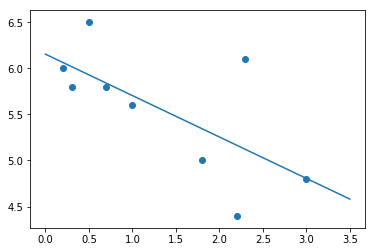

In [77]:
print(x_avg,y_avg)
b = -m_opt*x_avg + y_avg
print("b:",b)

def reg_gerade(x):
    return x*m_opt + b

print(reg_gerade(x_avg))

# Zeigen wir die Gerade in unseren Originaldaten
# Let's plot it between -1.5 and 2
opt_x = np.linspace(0,3.5,10) # 2 Punkte würden auch reichen...
opt_y = np.vectorize(reg_gerade)(opt_x)

# Let's see how this relates to our "corrected" input data
plt.plot(opt_x,opt_y)
plt.scatter(x,y)
plt.show()

Um eine lineare Regression zu einem 2-dimensionalen Datensatz zu finden, können wir nun immer wie folgt $m$ und $b$ für $n$ Datenpaare $(x_i,y_i)$ bestimmen:

Bestimme ${\bar x} = x_{avg} = \frac{\sum x_i}{n}$ und ${\bar y} = y_{avg} = \frac{\sum y_i}{n}$

Bestimme die Differenzen $\Delta x$,$\Delta y$

Bestimme $\Delta x^2 = \sum \Delta x_i^2$, $\Delta xy = \sum (\Delta x_i * \Delta y_i)$

Es gilt dann:

$m = \frac{\Delta xy}{\Delta x^2}$, $b = -m*{\bar x}  + {\bar y}$

Kontrollieren wir das ein letztes Mal:

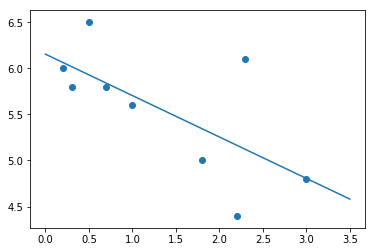

In [78]:
# Liefert eine Regressionsgerade als Funktion zurück
# Input: n Datenpaare (x_i,y_i)
def regression_factory(data):
    def lin_fnc(x,m,b):
        return m*x + b
    
    x = data[:,0] # Get value in all tuples at position 0
    y = data[:,1] # Get value in all tuples at position 1
    n = len(x) # or len(y), both have the same length
    # Determine mean values for x and y
    x_avg = sum(x) / n
    y_avg = sum(y) / n

    # Bilde die Differenzen 
    x_diff = np.add(x,-x_avg) # oben Delta x
    y_diff = np.add(y,-y_avg) # oben Delta y

    # Determine x^2 and xy from above
    x_diff_sqr = sum([a*a for a in x_diff]) # Oben Delta x^2
    xy_diff = sum([a*b for a,b in zip(x_diff,y_diff)]) # Oben Delta xy
    # Determine m and b
    m = xy_diff/x_diff_sqr
    b = -m*x_avg + y_avg
    # print("m:",m,"b:",b) # Debugging
    
    return partial(lin_fnc,m=m,b=b)

fnc = regression_factory(data)

opt_y = np.vectorize(fnc)(opt_x)

# Let's see how this relates to our "corrected" input data
plt.plot(opt_x,opt_y)
plt.scatter(x,y)
plt.show()

## 2-dimensionaler Parameterraum

Wir lösen jetzt die gleiche Problemstellung noch einmal, allerdings suchen wir "gleichzeitig" nach $m$ und $b$, d.h., wir wollen unmittelbar aus $x$ und $y$ die gesuchte optimale Parameterkombination bestimmen.

Zuerst betrachten wir die nun zwei-dimensionale Fehlerfunktion:

${Error} = \sum ({y}_{i} - {\hat y_{i}})^2 = \sum (y_{i} - lin\_func(x_{i}))^2 = \sum {\epsilon_{i}}^2$

Unser linerare Funktion ist nun nicht mehr nur von $m$, sondern auch noch von $b$ abhängig (ja, wir könnten $b$ in Abhängigkeit von $m$ ausdrücken, aber das wollen wir hier nicht tun), das deuten wir durch 

${Error} = \sum ({y}_{i} - {\hat y_{i}})^2 = \sum (y_{i} - lin\_func(x_{i},m,b))^2 = \sum {\epsilon_{i}}^2$

an.

Was passiert nun, wenn wir $m$ und $b$ variieren?

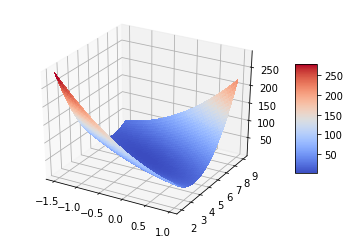

Best value in our grid: 2.055100000000001
Best error from above: 2.054822006472509


In [93]:
# making sure that x and y contain the correct values...
x = data[:,0] 
y = data[:,1] 

def err_value(m,b,x,y):
    err = [((yi-(m*xi+b))*(yi-(m*xi+b))) for xi,yi in zip(x,y)]
    return sum(err)

err_values = np.vectorize(partial(err_value,x=x,y=y)) # oder global machen

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
mdim = np.arange(-1.5, 1.0, 0.025) # interesting range for gradient
bdim = np.arange(2, 9, 0.025) # interesting range for bias

mdim,bdim = np.meshgrid(mdim,bdim)
vdim = err_values(mdim,bdim)
# print(mdim,bdim,vdim) # Debugging

# Plot the surface.
surf = ax.plot_surface(mdim, bdim, vdim, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

print("Best value in our grid:",np.min(vdim)) # keep in mind: the values in vdim are computed for
# pretty rough grid positions
print("Best error from above:",2.054822006472509) # best value found for b=0

In [94]:
pos = np.argmin(vdim, axis=None)
print(pos) # pointing into the flattened array
ind = np.unravel_index(pos, vdim.shape) # index fitted to the shape of the array
print(ind)
# the arguments m and b of the best value computed so far
print("Value:",vdim[ind],"m:",mdim[ind],"b:",bdim[ind]) 

16642
(166, 42)
Value: 2.055100000000001 m: -0.45000000000000373 b: 6.149999999999985


Da wir ja ein bisschen was lernen wollen...hier noch eine Visualisierung mit Hilfe einer Javascript-Bibliothek...ganz schön cool, oder? Mehr Infos: http://visjs.org/index.html ([Weitere Beispiele](https://www.l2f.inesc-id.pt/~david/wiki/pt/extensions/vis/examples/), andere Tools wären vielleicht langfristig eine bessere Wahl, vis.js wird derzeit nur eingeschränkt weiter entwickelt). Generell mehr zu 3D-Visualisierung im Notebook-Kontext findet man z.B. in dieser [StackOverflow-Frage](https://stackoverflow.com/questions/38364435/python-matplotlib-make-3d-plot-interactive-in-jupyter-notebook). zu interaktiven Widgets hier: http://jupyter.org/widgets oder zum State-of-the-Art in 3D-Visualisierung in Notebooks: https://www.youtube.com/watch?v=s-g3E3aAgEo.

In [95]:
from IPython.core.display import display, HTML
import json

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Z", initialCamera = None):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px",
        "xLabel": xlabel,
        "yLabel": ylabel,
        "zLabel": zlabel
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera
        
    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    display(HTML(htmlCode))

In [92]:
plot3D(mdim, bdim, vdim, height=500, xlabel="m", ylabel="b", zlabel="err") 
# kann bei zu großen Datensätzen zu einem Erreichen des DataLimits führen (seltsam)
# kann man aber erhöhen (wie genau?)
# Übrigens haben H,V und D mit der Kameraposition zu tun, kann man auch weglassen, klar.

In [138]:
## Wir modifizieren grad_descent so, dass wir auch in mehreren Dimension suchen
## (Hier könnten wir übrigens auch erst die eine, dann die andere Dimension
##  optimieren, auf Grund der Form des Error-Gebirges in unserem Problem
## würden wir dann auf jeden Fall im (globalen) Minimum landen.
## Noch ein Hinweis: wenn wir auf den Diff-Daten optimieren, gibt es
## würden wir mit dem Initialwert von 0 für b bereits das Optimum nur durch
## Suche auf m finden.

# Das zeigt ein mögliches Prinzip des Vorgehens. Wenn die Parameter
# unsensible gewählt werden, kann es sein, dass man sehr schnell und
# mit nicht besonders guten Werten terminiert. Das betrifft z.B.
# die Bounds und die max_step, die initial verwendet wird für die
# Schrittweite.
# Je nach Aussehen des Fehlergebirges kann es plausibler sein,
# feine Schrittweiten nach einem Wechsel des Parameters wieder
# auf "gross" zu setzen. In "smoothen" Gebirgen, in denen man
# sich mit dem einen oder anderen Parameter dem Optimum
# nähern kann, ist das allerdings nicht zielführend, da will
# man fein bleiben, weil man ohnehin nach der Suche über einem
# Parameter dessen Wert sehr nahe am Optimum hat (wie in unserem
# Beispiel). In anderen Situationen mag das anders aussehen.
def grad_descent_md(dims=2,
                 initial_value=[-0.5,6], # geht auch mit [0,0], klar
                 min_step=[0.00001,0.00001],
                 max_step=[0.1,0.1],
                 bound=[5,10],
                 efunc=err_value):
    # step_size = max_step # current step_size
    step = max_step[:] # signed step_size
    current = initial_value[:]
    dims = range(dims)
    
    last_v = efunc(*current,x,y)
    print("Initial error value and params: ",last_v,current)
    print("Parameter dimensions: ",dims)
    
    
    computed_while = 0 # book-keeping
    
    # Finds the best possible move by
    # variating each parameter +/- its 
    # current step size while keeping
    # all other parameter fixed
    # (Kann man noch verbessern, wenn
    # man den zuletzt optimierten Parameter
    # weg läßt, ist aber nicht substantiell,
    # zumal man zu Beginn noch gar keinen
    # Parameter optimiert hat ;)
    def best_direction(): 
        best_value = last_v
        move = None
        for v in dims:
            new_params = current[:] # copy current params
            new_params[v] -= math.fabs(step[v])
            test_value = efunc(*new_params,x,y)
            print(test_value,new_params)
            if test_value < best_value: 
                move = (v,-math.fabs(step[v]))
                best_value = test_value
            new_params = current[:] # copy current params
            new_params[v] += math.fabs(step[v])
            test_value = efunc(*new_params,x,y)
            print(test_value,new_params)
            if test_value < best_value: 
                move = (v,math.fabs(step[v]))
                best_value = test_value
        return move,best_value
    
    while True:
        # Pick parameter to optimize
        move,value = best_direction() 
        print("Selected move:",move,value)
        if move == None:
            print("No improvement seems possible!")
            print("While-Loops: ",computed_while)
            return last_v,current
            
        last_v = value

        param,pstep = move
        step[param] = pstep
        
        current[param] += pstep
    
        # Ok, we have found an initial direction, now
        # follow the identified parameter dimension
        # to the (relative) optimium

        while True:
            last_param_value = current[param]
            current[param] += step[param] # take the next step                          
            test_v = test_value = efunc(*current,x,y)
            # print(next_v,":",test_v) # comment in to see the development of values
            # is it an improvement?
            if test_v < last_v:
                # Guard against running out-of-bounds, can be problematic if we start
                # far from a good region, have large step size and run out-of-bounds
                # to early
                if math.fabs((current[param] + step[param]) - initial_value[param]) > bound[param]:
                    print("WARNING: we stopped iterating on the boundary! Might not be a true minimum!")
                    print("While-Loops: ",computed_while)
                    return last_v,current
                last_v = test_v # ok, one more step should be tried! Remember what we found!
            else:
                # reduce stepsize, change direction
                new_step = -(step[param]/10)            
                print("Changed step size and direction: ",step,"(",computed_while,")")
                if math.fabs(new_step) < min_step[param]:
                    print("While-Loops: ",computed_while," - Error value: ", last_v)
                    break # return last_grad # one step before the last step was better
                else:
                    step[param] = new_step # keep the new step size
                # Accept something worse...
                last_v = test_v # ok, one more step should be tried! Remember what we found!
            computed_while += 1 # counting the while loops


fehler, params = grad_descent_md()
print("Best gradient found (Error, [Parameterlist]):",fehler,params,"\n\n")

# Man könnte auch mit 0.001-min suchen, daraus eine gute Initialisierung ablesen, dann
# mit 0.000001-min komplett neu suchen (und max, und damit auch die initiale Schrittweite)
# auf ein Zehntel vom vorigen min setzen. Das ist insgesamt auch mehrfach denkbar. (kann beim
# Annähern an die Zielregion Aufwand sparen, weil man, wenn man gleich einen kleinen min
# hätte, auf der "groben" Suche möglicherweise zu schnell beim min landet und dann
# längere Zeit nur sehr kleine Veränderung nutzt in einer, zwei, drei...Dimension = teuer)

# Let's try:
fehler, params = grad_descent_md(initial_value=params,max_step=[0.000001,0.000001],min_step=[0.000000001,0.000000001])
print("Best gradient found (Error, [Parameterlist]):",fehler,params)

## Minimaler Effekt:
# Von 2.054822006543999  [-0.44985000000007686, 6.155339999996125]
# zu  2.0548220064726057 [-0.44983828200007736, 6.155339999996125]

Initial error value and params:  2.5199999999999996 [-0.5, 6]
Parameter dimensions:  range(0, 2)
3.378399999999997 [-0.6, 6]
2.146399999999999 [-0.4, 6]
3.0099999999999976 [-0.5, 5.9]
2.210000000000001 [-0.5, 6.1]
Selected move: (0, 0.1) 2.146399999999999
Changed step size and direction:  [0.1, 0.1] ( 0 )
Changed step size and direction:  [-0.01, 0.1] ( 8 )
Changed step size and direction:  [0.001, 0.1] ( 16 )
Changed step size and direction:  [-0.0001, 0.1] ( 26 )
Changed step size and direction:  [1e-05, 0.1] ( 33 )
While-Loops:  33  - Error value:  2.128646864863999
2.128646864863999 [-0.37293999999999994, 6]
2.128646871935999 [-0.3729199999999999, 6]
2.3136788659759975 [-0.37292999999999993, 5.9]
2.1236148659759984 [-0.37292999999999993, 6.1]
Selected move: (1, 0.1) 2.1236148659759984
Changed step size and direction:  [1e-05, 0.1] ( 33 )
Changed step size and direction:  [1e-05, -0.01] ( 49 )
Changed step size and direction:  [1e-05, 0.001] ( 63 )
Changed step size and direction:  

Selected move: (1, 1e-05) 2.0548620942000815
Changed step size and direction:  [-1e-05, 1e-05] ( 17579 )
While-Loops:  17579  - Error value:  2.054848354999996
2.054848060963995 [-0.44806000000007506, 6.152969999996214]
2.054848657283996 [-0.44804000000007504, 6.152969999996214]
2.054848354999996 [-0.44805000000007505, 6.152959999996215]
2.0548483601999945 [-0.44805000000007505, 6.152979999996214]
Selected move: (0, -1e-05) 2.054848060963995
Changed step size and direction:  [-1e-05, 1e-05] ( 17640 )
While-Loops:  17640  - Error value:  2.0548391886360533
2.0548392031640557 [-0.4486900000000757, 6.152969999996214]
2.0548391886360533 [-0.4486700000000757, 6.152969999996214]
2.0548393429760567 [-0.4486800000000757, 6.152959999996215]
2.0548390457760557 [-0.4486800000000757, 6.152979999996214]
Selected move: (1, 1e-05) 2.0548390457760557
Changed step size and direction:  [-1e-05, 1e-05] ( 17722 )
While-Loops:  17722  - Error value:  2.0548330597759983
2.0548328695639966 [-0.44869000000007

## Analytische Lösung

Unsere Fehlerfunktion ist jetzt von zwei Parametern abhängig, $m$ und $b$:

${Error} = \sum ({y}_{i} - {\hat y_{i}})^2 = \sum (y_{i} - lin\_func(x_{i},m,b))^2$

$\quad = \sum (y_{i} - (m*x_{i}+b))^2 = \sum {\epsilon_{i}}^2$

Jetzt können wir partiell Differenzieren - und zwar einmal nach $m$ und einmal nach $b$. Wir fragen uns damit also, wie die Steigung aussieht, um verstehen zu können, wie sich die Funktionswerte lokal ändern werden, wenn wir an $m$ bzw. $b$ getrennt "wackeln".

Wir haben die Funktion oben schon ein wenig umgeformt, wiederholen wir das hier:

${Error} = \sum (y_{i} - (m*x_{i}+b))^2 = $

$\quad = \sum (m*x_i + b - y_i)^2 = \sum ((m*x_i)^2 + m*x_i*b - m*x_i*y_i + b*m*x_i + b^2 -b*y_i -m*x_i*y_i - y_i*b + y_i^2)$

$\quad = \sum (m*x_i)^2 + 2\sum (m*x_i*b) - 2\sum (m*x_i*y_i) + \sum b^2 - 2\sum (b*y_i) + \sum y_i^2$

$\quad = m^2\sum x_i^2 + 2*m*b*\sum x_i - 2m\sum (x_i*y_i) + nb^2 - 2b\sum y_i + \sum y_i^2$
                   
Jetzt leiten wir die Funktion zunächst nach $m$ ab:

$ Error^{'}_{m} = 2*m\sum x_i^2 + 2*b*\sum x_i - 2\sum (x_i*y_i)$

Nun noch nach $b$:

$ Error^{'}_{b} = 2m*\sum x_i + 2nb - 2\sum y_i$

Beide Steigungen sollen verschwinden, also 0 sein:

(1) $2*m\sum x_i^2 + 2b*\sum x_i - 2\sum (x_i*y_i) = 0$

(2) $2m*\sum x_i + 2nb - 2\sum y_i = 0$

Damit man es mit dem Lösen etwas leichter hat, setzen wir $a_1 = \sum x_i^2$, $a_2 = \sum x_i$, $a_3 = \sum (x_i*y_i)$, $a_4 = \sum y_i$, das führt zu:

(1) $2ma_1 + 2ba_2 - 2a_3 = 0$

(2) $2ma_2 + 2nb - 2a_4 = 0$

Jetzt stellen wir ein wenig um und teilen durch 2:

(1.1) $ma_1 + ba_2 = a_3 $

(2.1) $ma_2 + nb = a_4$

(1.1) nach $b$ umstellen (nur möglich, wenn nicht alle $x_i$ 0 sind, also alle Daten $0$ als $x$-Komponente haben)

(1.2) $b = \frac{a_3-ma_1}{a_2}$

und das in (2.1) einsetzen und nach $m$ auflösen:

(2.2) $ma_2 + \frac{n(a_3-ma_1)}{a_2}  = a_4$

$\quad \equiv ma_2^2 + na_3 - nma_1  = a_4a_2$

$\quad \equiv ma_2^2 - nma_1 = a_4a_2-na_3$

$\quad \equiv m(a_2^2 - na_1) = a_4a_2-na_3$

$\quad \equiv m = \frac{a_4a_2-na_3}{a_2^2 - na_1}$

<!--
Andere Alternative:

(1.1) nach $m$ umstellen:

(1.2) $m = \frac{a_3-ba_2}{a_1}$

Das in (2.1) einsetzen und nach $b$ auflösen:

(2.2) $\frac{a_3-ba_2}{a_1}a_2 + nb = a_4$

$\quad \equiv a_3a_2-ba_2^2 + nba_1 = a_4a_1$

$\quad \equiv -ba_2^2 + nba_1 = a_4a_1-a_3a_2$

$\quad \equiv nba_1 - ba_2^2 = a_4a_1-a_3a_2$

$\quad \equiv b(na_1 - a_2^2) = a_4a_1-a_3a_2$

$\quad \equiv b = \frac{a_4a_1-a_3a_2}{na_1 - a_2^2}$
-->
Probieren wir das aus:

In [156]:
# x,y sind oben gegeben
# making sure that x and y contain the correct values...
x = data[:,0] 
y = data[:,1] 

# Koeffizienten
a1 = sum([a*a for a in x])
a2 = sum(x)
a3 = sum([a*b for a,b in zip(x,y)])
a4 = sum(y)
n = len(x)

print("Koeffizienten:",a1,a3,a3,a4,n,"\n")

m = (a4*a2-n*a3)/(a2*a2-n*a1)
print("m:",m)

b = (a3-m*a1)/a2
print("b:",b)

err = err_value(m,b,x,y)
print("Quadratischer Fehler:",err)

Koeffizienten: 24.240000000000002 62.96 62.96 50.0 9 

m: -0.4498381877022654
b: 6.155339805825243
Quadratischer Fehler: 2.0548220064724916


Das ist korrekt! Analytisches und experimentelles Ergebnis stimmt "praktisch" überein.

Hier noch eine kleine Übung: zeigen wir, dass die Ausgleichsgerade durch den Schwerpunkt geht.

Um das tun zu können, schauen wir uns mal an, wie unsere Gleichungen für $m$ und $b$ eigentlich inhaltlich aussehen:

$m = \frac{a_4a_2-na_3}{a_2^2 - na_1} = \frac{\sum y_i\sum x_i-n\sum(x_iy_i)}{(\sum x_i)^2-n\sum x_i^2}$

Schauen wir uns zunächst den Zähler von $m$ genauer an und bedenken, dass z.B. ${\bar x} = (\sum x_i)/n$, d.h. $\sum x_i = n{\bar x}$.

$\sum y_i\sum x_i-n\sum(x_iy_i) = n{\bar x}n{\bar y}-n\sum(x_iy_i) = -n(-n{\bar x}{\bar y}+\sum(x_iy_i))$

$\quad\quad = -n(\sum(x_iy_i)-n{\bar x}{\bar y})$ = $-n(\sum((x_i-{\bar x})(y_i-{\bar y})))$ (s. Transformation (a2) unten) 

Jetzt noch der Zähler:

$(\sum x_i)^2-n\sum x_i^2 = (n{\bar x})^2-n\sum x_i^2 = n^2{\bar x}^2-n\sum x_i^2$ 

$\quad\quad = -n(\sum x_i^2-n{\bar x}) = -n(\sum(x_i - {\bar x})^2)$ (s. Transformation (a1) unten) 

Damit ergibt sich ($-n$ verschwindet, klar):

$m = \frac{\sum((x_i-{\bar x})(y_i-{\bar y}))}{\sum(x_i - {\bar x})^2}$

Das sieht doch wesentlich umgänglicher aus! Verwenden wir das in $b$, unser Ziel ist übrigens zu zeigen, dass $b = {\bar y} - m{\bar x}$ ist (damit ist dann auch gezeigt, dass der Schwerpunkt auf der Geraden liegt, stellen Sie einfach nach ${\bar y}$ um).

Um eine angenehm zu rechnende Darstellung für $b$ zu haben, stellen wir die Formel (1.1), also $ma_1 + ba_2 = a_3$, nach $b$ um (ja ja, hätten wir auch gleich so herum rechnen können...):

$b = \frac{a_4-ma_2}{n} = \frac{\sum y_i - m\sum x_i}{n}$ 

$\quad = \frac{\sum y_i}{n} - m\frac{\sum x_i}{n}$ 

$\quad = {\bar y} - m{\bar x}$

Das war, was wir zeigen wollten, es ist also tatsächlich so, dass der Schwerpunkt auf der Geraden liegt (unsere Annahme oben für die verschobenen Daten war also korrekt). Wir sehen das direkt nach einer kleinen Umstellung:

$b = {\bar y} -  m{\bar x}$ $\equiv$ ${\bar y} = m{\bar x} + b$, d.h. der Funktionsert zu ${\bar x}$ ist für unsere Gerade tatsächlich ${\bar y}$ (wenn nicht alle Punkte die gleiche $x$-Koordinate aufweisen).

Wir zeigen noch die oben verwendeten Herleitungen:
 
 (a1) $\sum(x_i - {\bar x})^2 = \sum ((x_i - {\bar x})(x_i - {\bar x})) = \sum (x_i^2 -2{\bar x}x_i + {\bar x}^2)$
 
 $\quad\quad\quad = \sum x_i^2 -2{\bar x}\sum x_i + \sum {\bar x}^2 = \sum x_i^2 -2{\bar x}\sum x_i + n{\bar x}^2$
 
 $\quad\quad\quad = \sum x_i^2 - 2{\bar x}n\frac{\sum x_i}{n} + n{\bar x}^2 = \sum x_i^2 -2{\bar x}n{\bar x} + n{\bar x}^2$
 
 $\quad\quad\quad = \sum x_i^2 -2n{\bar x}^2 + n{\bar x}^2 = \sum x_i^2 + n{\bar x}^2$ 
 
 (a2) $\sum((x_i-{\bar x})(y_i-{\bar y})) = \sum(x_iy_i-x_i{\bar y}-{\bar x}{y_i}+{\bar x}{\bar y})$
 
 $\quad\quad\quad = \sum(x_iy_i) - {\bar y}\sum x_i - {\bar x}\sum y_i + n{\bar x}{\bar y}$
 
 $\quad\quad\quad = \sum(x_iy_i) - {\bar y}n{\bar x} - {\bar x}n{\bar y} + n{\bar x}{\bar y}$
 
 $\quad\quad\quad = \sum(x_iy_i) - n{\bar x}{\bar y} - n{\bar x}{\bar y} + n{\bar x}{\bar y} = \sum(x_iy_i) - n{\bar x}{\bar y}$

Eine Erweiterung auf Polynome findet sich z.B. in http://fuzzy.cs.ovgu.de/studium/ida_fs/txt/regress.pdf.

#

#

#

#

#

#

#

#


#

#

#

#

#